# Tenant Churn Behavior of Company M

## Data Cleansing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_booking = pd.read_csv('Booking Journey Tenant.csv', low_memory=False)

In [3]:
df_booking.head()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
0,1,28/06/2018,MALE,google,Web,Windows Desktop,No,CITY01,9.0,50,19,157,42,19,1
1,2,25/05/2019,MALE,google,Web,Windows Desktop,No,CITY04,15.0,74,8,238,18,28,1
2,3,28/09/2018,FEMALE,basic,Web,Windows Desktop,yes,CITY01,3.0,67,18,174,37,29,1
3,4,05/12/2019,FEMALE,google,Web,Windows Desktop,yes,CITY01,21.0,79,4,17,37,17,0
4,5,14/09/2018,MALE,basic,Web,Windows Desktop,yes,CITY01,5.0,17,19,89,35,28,0


In [4]:
df_booking.tail()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
217150,217151,NaN,FEMALE,NaN,NaN,NaN,NaN,CITY05,12.0,68,20,84,9,15,0
217151,217152,NaN,MALE,NaN,NaN,NaN,NaN,CITY03,12.0,81,26,126,13,28,1
217152,217153,NaN,MALE,NaN,NaN,NaN,NaN,CITY01,14.0,56,7,243,3,20,1
217153,217154,NaN,MALE,NaN,NaN,NaN,NaN,CITY01,10.0,80,22,10,30,1,1
217154,217155,NaN,FEMALE,NaN,NaN,NaN,NaN,CITY02,32.0,41,20,285,29,15,0


In [5]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217155 entries, 0 to 217154
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tenant_id             217155 non-null  int64  
 1   date_account_created  213451 non-null  object 
 2   gender                217155 non-null  object 
 3   signup_method         213451 non-null  object 
 4   signup_type           60008 non-null   object 
 5   first_device_type     1606 non-null    object 
 6   submit_booking        89599 non-null   object 
 7   domisili_code         217155 non-null  object 
 8   total favorite        38044 non-null   float64
 9   total_chat            217155 non-null  int64  
 10  total_submit booking  217155 non-null  int64  
 11  total visit           217155 non-null  int64  
 12  total visit listing   217155 non-null  int64  
 13  total click booking   217155 non-null  int64  
 14  churn                 217155 non-null  int64  
dtype

In [6]:
df_booking.isnull().sum()/df_booking.shape[0]

tenant_id               0.000000
date_account_created    0.017057
gender                  0.000000
signup_method           0.017057
signup_type             0.723663
first_device_type       0.992604
submit_booking          0.587396
domisili_code           0.000000
total favorite          0.824807
total_chat              0.000000
total_submit booking    0.000000
total visit             0.000000
total visit listing     0.000000
total click booking     0.000000
churn                   0.000000
dtype: float64

In this data cleaning process, two steps are carried out, changing inappropriate data types and handling missing values.
* Changing Inappropriate Data Types
  * date_account_created (from string to datetime)  
* Handling Missing Values
  * date_account_created (replace with the closest value from above (forward fill method))
  * signup_method (filled with the word "unknown") 
  * signup_type (filled with the word "unknown") 
  * first_device_type (filled with the word "unknown") 
  * submit_booking (filled with the word "unknown")  
  * total favorite (drop column) 

In [7]:
# date_account_created column
df_booking['date_account_created'] = pd.to_datetime(df_booking['date_account_created'])

C:\Users\Renata\AppData\Local\Temp\ipykernel_12552\2138851244.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_booking['date_account_created'] = pd.to_datetime(df_booking['date_account_created'])


In [8]:
df_booking['date_account_created'] = df_booking['date_account_created'].fillna(method='ffill')
df_booking.tail()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
217150,217151,2023-06-30,FEMALE,NaN,NaN,NaN,NaN,CITY05,12.0,68,20,84,9,15,0
217151,217152,2023-06-30,MALE,NaN,NaN,NaN,NaN,CITY03,12.0,81,26,126,13,28,1
217152,217153,2023-06-30,MALE,NaN,NaN,NaN,NaN,CITY01,14.0,56,7,243,3,20,1
217153,217154,2023-06-30,MALE,NaN,NaN,NaN,NaN,CITY01,10.0,80,22,10,30,1,1
217154,217155,2023-06-30,FEMALE,NaN,NaN,NaN,NaN,CITY02,32.0,41,20,285,29,15,0


In [9]:
# signup_method column
df_booking['signup_method']  = df_booking['signup_method'] .fillna('unknown')
df_booking.tail()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
217150,217151,2023-06-30,FEMALE,unknown,NaN,NaN,NaN,CITY05,12.0,68,20,84,9,15,0
217151,217152,2023-06-30,MALE,unknown,NaN,NaN,NaN,CITY03,12.0,81,26,126,13,28,1
217152,217153,2023-06-30,MALE,unknown,NaN,NaN,NaN,CITY01,14.0,56,7,243,3,20,1
217153,217154,2023-06-30,MALE,unknown,NaN,NaN,NaN,CITY01,10.0,80,22,10,30,1,1
217154,217155,2023-06-30,FEMALE,unknown,NaN,NaN,NaN,CITY02,32.0,41,20,285,29,15,0


In [10]:
# signup_type column
df_booking['signup_type']  = df_booking['signup_type'] .fillna('unknown')
df_booking.tail()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
217150,217151,2023-06-30,FEMALE,unknown,unknown,NaN,NaN,CITY05,12.0,68,20,84,9,15,0
217151,217152,2023-06-30,MALE,unknown,unknown,NaN,NaN,CITY03,12.0,81,26,126,13,28,1
217152,217153,2023-06-30,MALE,unknown,unknown,NaN,NaN,CITY01,14.0,56,7,243,3,20,1
217153,217154,2023-06-30,MALE,unknown,unknown,NaN,NaN,CITY01,10.0,80,22,10,30,1,1
217154,217155,2023-06-30,FEMALE,unknown,unknown,NaN,NaN,CITY02,32.0,41,20,285,29,15,0


In [11]:
# first_device_type column
df_booking['first_device_type']  = df_booking['first_device_type'] .fillna('unknown')
df_booking.tail()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
217150,217151,2023-06-30,FEMALE,unknown,unknown,unknown,NaN,CITY05,12.0,68,20,84,9,15,0
217151,217152,2023-06-30,MALE,unknown,unknown,unknown,NaN,CITY03,12.0,81,26,126,13,28,1
217152,217153,2023-06-30,MALE,unknown,unknown,unknown,NaN,CITY01,14.0,56,7,243,3,20,1
217153,217154,2023-06-30,MALE,unknown,unknown,unknown,NaN,CITY01,10.0,80,22,10,30,1,1
217154,217155,2023-06-30,FEMALE,unknown,unknown,unknown,NaN,CITY02,32.0,41,20,285,29,15,0


In [12]:
# submit_booking column
df_booking['submit_booking']  = df_booking['submit_booking'] .fillna('unknown')
df_booking.tail()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total favorite,total_chat,total_submit booking,total visit,total visit listing,total click booking,churn
217150,217151,2023-06-30,FEMALE,unknown,unknown,unknown,unknown,CITY05,12.0,68,20,84,9,15,0
217151,217152,2023-06-30,MALE,unknown,unknown,unknown,unknown,CITY03,12.0,81,26,126,13,28,1
217152,217153,2023-06-30,MALE,unknown,unknown,unknown,unknown,CITY01,14.0,56,7,243,3,20,1
217153,217154,2023-06-30,MALE,unknown,unknown,unknown,unknown,CITY01,10.0,80,22,10,30,1,1
217154,217155,2023-06-30,FEMALE,unknown,unknown,unknown,unknown,CITY02,32.0,41,20,285,29,15,0


In [13]:
# total favorite column
df_booking.drop('total favorite', axis=1, inplace=True)

In [14]:
# # churn column
df_booking['churn'] = (df_booking['churn']).astype(int)

In [15]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217155 entries, 0 to 217154
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   tenant_id             217155 non-null  int64         
 1   date_account_created  217155 non-null  datetime64[ns]
 2   gender                217155 non-null  object        
 3   signup_method         217155 non-null  object        
 4   signup_type           217155 non-null  object        
 5   first_device_type     217155 non-null  object        
 6   submit_booking        217155 non-null  object        
 7   domisili_code         217155 non-null  object        
 8   total_chat            217155 non-null  int64         
 9   total_submit booking  217155 non-null  int64         
 10  total visit           217155 non-null  int64         
 11  total visit listing   217155 non-null  int64         
 12  total click booking   217155 non-null  int64         
 13 

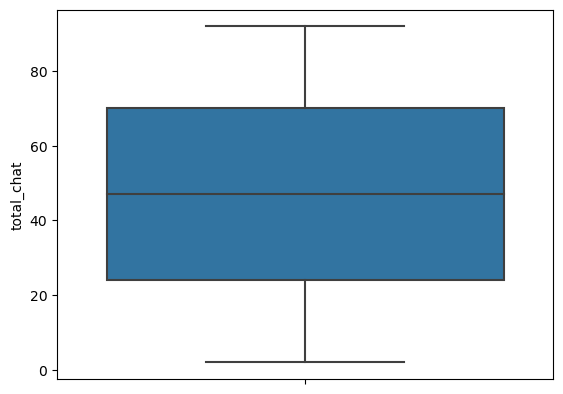

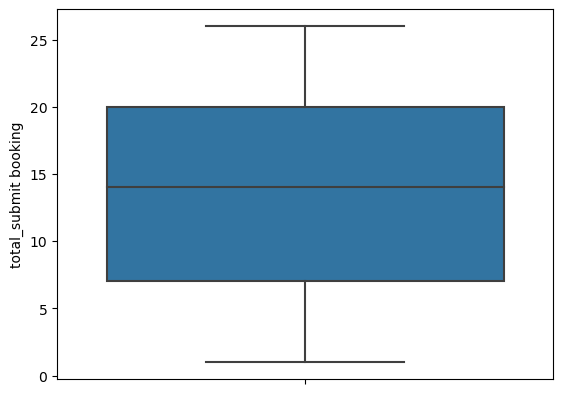

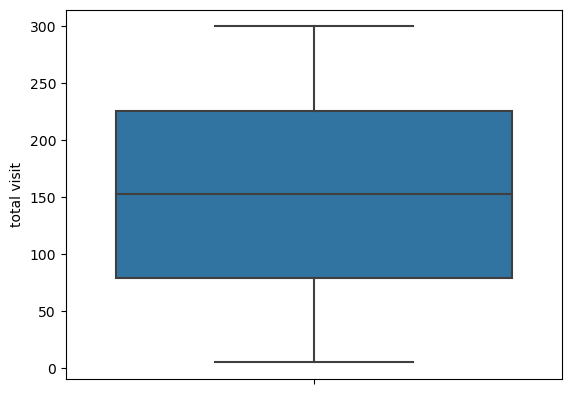

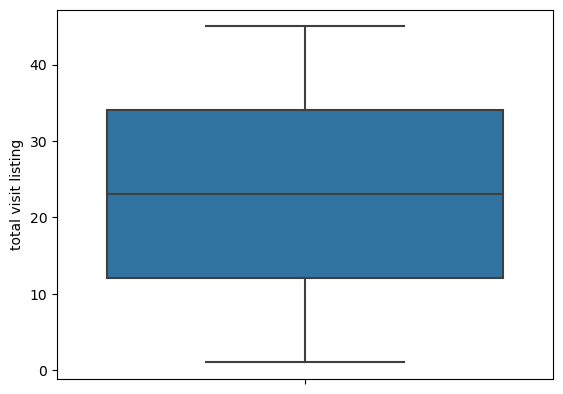

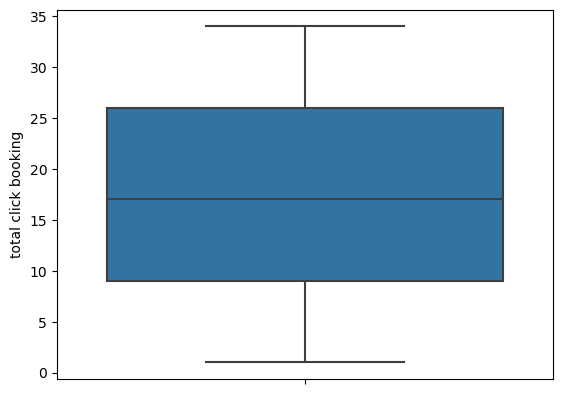

In [16]:
cols = df_booking.iloc[:, 8:13]  
for i in cols:
    sns.boxplot(y=df_booking[i])
    plt.show()

In [17]:
# date_account_created monipulation
from datetime import datetime
df_booking['date_account_created'] = pd.to_datetime(df_booking['date_account_created'])
current_date = datetime.now()
df_booking['user_account_age'] = (current_date - df_booking['date_account_created']).dt.days// 30
print(df_booking[['date_account_created', 'user_account_age']])
df_booking['user_account_age'].value_counts().sort_values(ascending=False)

       date_account_created  user_account_age
0                2018-06-28                66
1                2019-05-25                55
2                2018-09-28                63
3                2019-05-12                55
4                2018-09-14                63
...                     ...               ...
217150           2023-06-30                 5
217151           2023-06-30                 5
217152           2023-06-30                 5
217153           2023-06-30                 5
217154           2023-06-30                 5

[217155 rows x 2 columns]


5     14474
18    10135
7      9060
26     8658
20     7874
      ...  
69      185
68      183
70      176
71      133
72       10
Name: user_account_age, Length: 74, dtype: int64

In [19]:
quartile_labels = ["New Users", "Intermediate Users", "Long-Term Users"]
df_booking['age_category'] = pd.qcut(df_booking['user_account_age'], q=[0, 0.25, 0.75, 1], labels=quartile_labels)

In [24]:
# total chat category
q1 = df_booking['total_chat'].quantile(0.25)
q2 = df_booking['total_chat'].quantile(0.5)
q3 = df_booking['total_chat'].quantile(0.75)
df_booking['total_chat_category'] = pd.cut(df_booking['total_chat'], bins=[0, q1, q2, q3, 100], labels=['Low Chat', 'Moderate Chat', 'High Chat', 'Very High Chat'])

In [25]:
# total submit category
q1 = df_booking['total_submit booking'].quantile(0.25)
q2 = df_booking['total_submit booking'].quantile(0.5)
q3 = df_booking['total_submit booking'].quantile(0.75)
df_booking['total_submit booking_category'] = pd.cut(df_booking['total_submit booking'], bins=[0, q1, q2, q3, 100], labels=['Low Submissions', 'Moderate Submissions', 'High Submissions', 'Very High Submissions'])

In [26]:
# total visit category
q1 = df_booking['total visit'].quantile(0.25)
q2 = df_booking['total visit'].quantile(0.5)
q3 = df_booking['total visit'].quantile(0.75)
def fare(a):
    if a>=0 and a <q1:
        return 'Low Visits'
    elif a>=q1 and a <q2:
        return 'Moderate Visits'
    elif a>=q2 and a <q3:
        return 'High Visits'
    else:
        return 'Very High Visits'

In [27]:
df_booking['total visit_category'] = df_booking['total visit'].apply(fare)

In [28]:
# total visit listing category
q1 = df_booking['total visit listing'].quantile(0.25)
q2 = df_booking['total visit listing'].quantile(0.5)
q3 = df_booking['total visit listing'].quantile(0.75)
df_booking['total visit listing_category'] = pd.cut(df_booking['total visit listing'], bins=[0, q1, q2, q3, 100], labels=['Low Listing Visits', 'Moderate Listing Visits', 'High Listing Visits', 'Very High Listing Visits'])

In [29]:
# total click booking category
q1 = df_booking['total click booking'].quantile(0.25)
q2 = df_booking['total click booking'].quantile(0.5)
q3 = df_booking['total click booking'].quantile(0.75)
df_booking['total click booking_category'] = pd.cut(df_booking['total click booking'], bins=[0, q1, q2, q3, 100], labels=['Low Clicks', 'Moderate Clicks', 'High Clicks', 'Very High Clicks'])

In [30]:
df_booking.to_csv('data category.csv', index=False)

In [31]:
dt_booking = pd.read_csv('data category.csv')

In [32]:
dt_booking.head()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total_chat,total_submit booking,...,total visit listing,total click booking,churn,user_account_age,age_category,total_chat_category,total_submit booking_category,total visit_category,total visit listing_category,total click booking_category
0,1,2018-06-28,MALE,google,Web,Windows Desktop,No,CITY01,50,19,...,42,19,1,66,Long-Term Users,High Chat,High Submissions,High Visits,Very High Listing Visits,High Clicks
1,2,2019-05-25,MALE,google,Web,Windows Desktop,No,CITY04,74,8,...,18,28,1,55,Long-Term Users,Very High Chat,Moderate Submissions,Very High Visits,Moderate Listing Visits,Very High Clicks
2,3,2018-09-28,FEMALE,basic,Web,Windows Desktop,yes,CITY01,67,18,...,37,29,1,63,Long-Term Users,High Chat,High Submissions,High Visits,Very High Listing Visits,Very High Clicks
3,4,2019-05-12,FEMALE,google,Web,Windows Desktop,yes,CITY01,79,4,...,37,17,0,55,Long-Term Users,Very High Chat,Low Submissions,Low Visits,Very High Listing Visits,Moderate Clicks
4,5,2018-09-14,MALE,basic,Web,Windows Desktop,yes,CITY01,17,19,...,35,28,0,63,Long-Term Users,Low Chat,High Submissions,Moderate Visits,Very High Listing Visits,Very High Clicks


In [33]:
dt_booking['churn'] = (dt_booking['churn']).astype(str)

In [34]:
dt_booking['churn'].replace('1', 'Churn', inplace=True)
dt_booking['churn'].replace('0', 'Not Churn', inplace=True)

In [35]:
dt_booking.head()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total_chat,total_submit booking,...,total visit listing,total click booking,churn,user_account_age,age_category,total_chat_category,total_submit booking_category,total visit_category,total visit listing_category,total click booking_category
0,1,2018-06-28,MALE,google,Web,Windows Desktop,No,CITY01,50,19,...,42,19,Churn,66,Long-Term Users,High Chat,High Submissions,High Visits,Very High Listing Visits,High Clicks
1,2,2019-05-25,MALE,google,Web,Windows Desktop,No,CITY04,74,8,...,18,28,Churn,55,Long-Term Users,Very High Chat,Moderate Submissions,Very High Visits,Moderate Listing Visits,Very High Clicks
2,3,2018-09-28,FEMALE,basic,Web,Windows Desktop,yes,CITY01,67,18,...,37,29,Churn,63,Long-Term Users,High Chat,High Submissions,High Visits,Very High Listing Visits,Very High Clicks
3,4,2019-05-12,FEMALE,google,Web,Windows Desktop,yes,CITY01,79,4,...,37,17,Not Churn,55,Long-Term Users,Very High Chat,Low Submissions,Low Visits,Very High Listing Visits,Moderate Clicks
4,5,2018-09-14,MALE,basic,Web,Windows Desktop,yes,CITY01,17,19,...,35,28,Not Churn,63,Long-Term Users,Low Chat,High Submissions,Moderate Visits,Very High Listing Visits,Very High Clicks


In [36]:
dt_booking.to_csv('data clean new.csv', index=False)

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
booking_clean = pd.read_csv('data clean new.csv')

In [3]:
booking_clean.head()

,tenant_id,date_account_created,gender,signup_method,signup_type,first_device_type,submit_booking,domisili_code,total_chat,total_submit booking,...,total visit listing,total click booking,churn,user_account_age,age_category,total_chat_category,total_submit booking_category,total visit_category,total visit listing_category,total click booking_category
0,1,2018-06-28,MALE,google,Web,Windows Desktop,No,CITY01,50,19,...,42,19,Churn,66,Long-Term Users,High Chat,High Submissions,High Visits,Very High Listing Visits,High Clicks
1,2,2019-05-25,MALE,google,Web,Windows Desktop,No,CITY04,74,8,...,18,28,Churn,55,Long-Term Users,Very High Chat,Moderate Submissions,Very High Visits,Moderate Listing Visits,Very High Clicks
2,3,2018-09-28,FEMALE,basic,Web,Windows Desktop,yes,CITY01,67,18,...,37,29,Churn,63,Long-Term Users,High Chat,High Submissions,High Visits,Very High Listing Visits,Very High Clicks
3,4,2019-05-12,FEMALE,google,Web,Windows Desktop,yes,CITY01,79,4,...,37,17,Not Churn,55,Long-Term Users,Very High Chat,Low Submissions,Low Visits,Very High Listing Visits,Moderate Clicks
4,5,2018-09-14,MALE,basic,Web,Windows Desktop,yes,CITY01,17,19,...,35,28,Not Churn,63,Long-Term Users,Low Chat,High Submissions,Moderate Visits,Very High Listing Visits,Very High Clicks


In [4]:
booking_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217155 entries, 0 to 217154
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   tenant_id                      217155 non-null  int64 
 1   date_account_created           217155 non-null  object
 2   gender                         217155 non-null  object
 3   signup_method                  217155 non-null  object
 4   signup_type                    217155 non-null  object
 5   first_device_type              217155 non-null  object
 6   submit_booking                 217155 non-null  object
 7   domisili_code                  217155 non-null  object
 8   total_chat                     217155 non-null  int64 
 9   total_submit booking           217155 non-null  int64 
 10  total visit                    217155 non-null  int64 
 11  total visit listing            217155 non-null  int64 
 12  total click booking            217155 non-nu

### Score Card : Total Tenant

In [5]:
total_tenant = booking_clean['tenant_id'].count()
print(total_tenant)

217155


### Score Card : Average Visits Over the Last Five Years

In [6]:
avg_visit = booking_clean['total visit'].mean()
print(avg_visit)

152.65603831364695


### Score Card : Total Bookings Over the Last Five Years

In [50]:
total_booking = booking_clean['total_submit booking'].sum()
print(total_booking)

2936617


### Score Card : Churn Rate Over the Last Five Years

In [7]:
churn_rate = (booking_clean[booking_clean['churn'] == 'Churn']['tenant_id'].count() / booking_clean['tenant_id'].count()) * 100
print(churn_rate)

50.02003177453892


### What is the composition of tenant churn in the last five years?

Text(0.5, 1.0, 'Tenant Churn Composition')

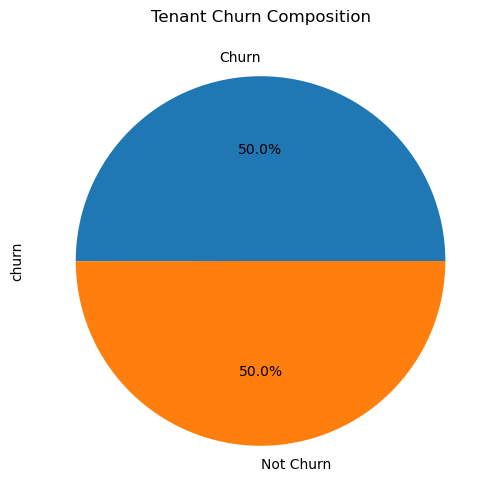

In [8]:
plt.figure(figsize=(10, 6))
booking_clean['churn'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Tenant Churn Composition')

In [9]:
churn_counts = booking_clean['churn'].value_counts()
print(churn_counts)

Churn        108621
Not Churn    108534
Name: churn, dtype: int64


The graphic shows the composition of churn data indicating that exactly 50% of users are still using Company M services. There is a balanced percentage between users who are still using Company M services and those who are not. The data highlights a crucial point where half of user interactions still involve Company M services.

### How does the growth in the number of tenants affect the tenant churn rate from year to year?

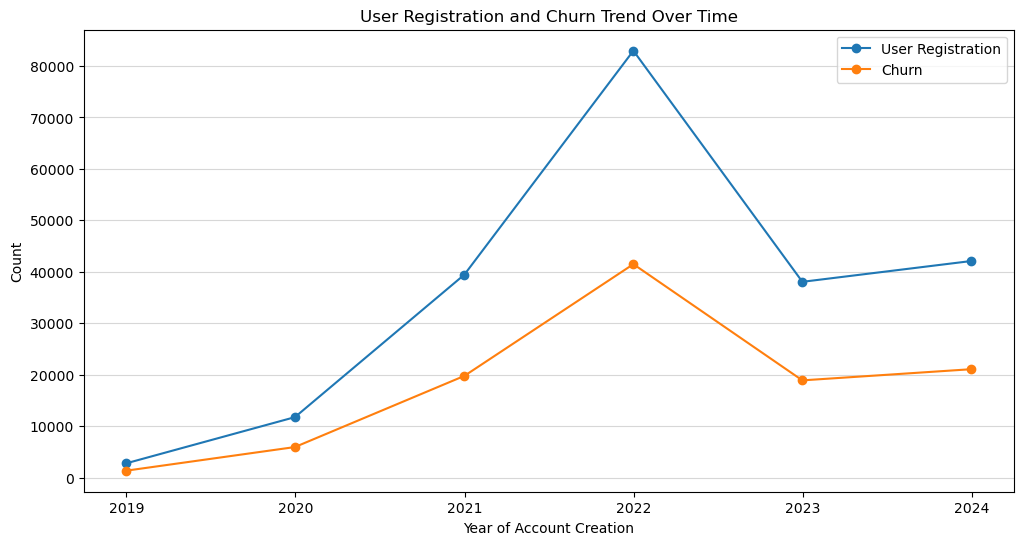

In [10]:
booking_clean['date_account_created'] = pd.to_datetime(booking_clean['date_account_created'])
user_registration_trend = booking_clean.groupby(pd.Grouper(key='date_account_created', freq='Y')).size().reset_index(name='user_count')
churn_trend = booking_clean[booking_clean['churn'] == 'Churn'].groupby(pd.Grouper(key='date_account_created', freq='Y')).size().reset_index(name='churn_count')

merged_df = pd.merge(user_registration_trend, churn_trend, how='outer', on='date_account_created').fillna(0)
merged_df['churn_rate'] = (merged_df['churn_count'] / merged_df['user_count']) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date_account_created'], merged_df['user_count'], marker='o', label='User Registration')
plt.plot(merged_df['date_account_created'], merged_df['churn_count'], marker='o', label='Churn')
plt.title('User Registration and Churn Trend Over Time')
plt.xlabel('Year of Account Creation')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

In [11]:
booking_clean['date_account_created'] = pd.to_datetime(booking_clean['date_account_created'])
booking_clean['year'] = booking_clean['date_account_created'].dt.year
all_tenants_pivot = booking_clean.pivot_table(index='year', aggfunc={'tenant_id': 'count'}, fill_value=0)

churn_data = booking_clean[booking_clean['churn'] == 'Churn']
churned_tenants_pivot = churn_data.pivot_table(index='year', aggfunc={'tenant_id': 'count'}, fill_value=0)
merged_pivot = pd.merge(all_tenants_pivot, churned_tenants_pivot, on='year', suffixes=('_total', '_churn'))
print(merged_pivot)

      tenant_id_total  tenant_id_churn
year                                  
2018             2788             1365
2019            11775             5964
2020            39462            19790
2021            82960            41495
2022            38064            18918
2023            42106            21089


Based on the available data, there is a discernible pattern in the user registration trends over the past few years. From 2018 to 2021, there is a consistent increase, indicating progression in user registrations. However, in 2022, there was a significant 20% decrease in user registrations. This decline suggests a notable shift in user engagement during that period. Interestingly, user registrations showed improvement in 2023, with a 1% increase.

Similarly, trends in churn (user discontinuation) and retention provide intriguing insights into user behavior. Although specific details of these trends are not explicitly provided, we can infer that the patterns of users leaving the service (churn) and those choosing to continue using the service (retention) have experienced fluctuations over the past few years.

### How does the tenant booking submission rate compare to the tenant churn rate over the last five years?

In [12]:
def make_pivot(param1, param2):     
    df_slice = booking_clean[[param1, param2, 'tenant_id']]     
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size, fill_value=0)     
    
    order = slice_pivot.sum(axis=1).sort_values(ascending=False).index
    p_chart = slice_pivot.loc[order].plot(kind='bar')
    
    for container in p_chart.containers:
        total = booking_clean['tenant_id'].count()
        for value in container:
            percentage = value.get_height() / total
            p_chart.annotate(f'{percentage:.2%}', 
                              (value.get_x() + value.get_width() / 2., value.get_height()), 
                              ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=6)
 
    plt.xticks(rotation=0)     
    return slice_pivot, p_chart

(               tenant_id          
 churn              Churn Not Churn
 submit_booking                    
 No                   346       345
 unknown            63771     63785
 yes                44504     44404,
 <Axes: xlabel='submit_booking'>)

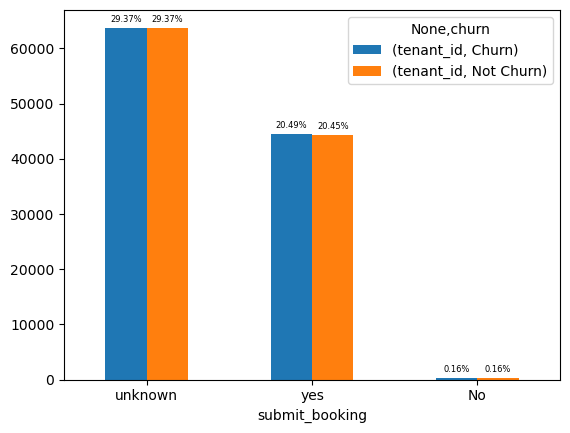

In [13]:
make_pivot('submit_booking', 'churn')

Based on the chart provided, it can be observed that a significant portion of the data does not indicate whether tenants have submitted bookings or not. However, 49.99% of this data suggests that tenants are no longer using the service. In contrast, among the data showing that tenants have submitted bookings, 50.05% are still using the service, while 49.95% have discontinued the service. Furthermore, among tenants who did not submit bookings, 50% have ceased using the service. This suggests that the behavior of tenants, whether they submit bookings or not, is influenced by their needs for Company M services.

### What is the distribution of cities based on tenant churn over the last five years?

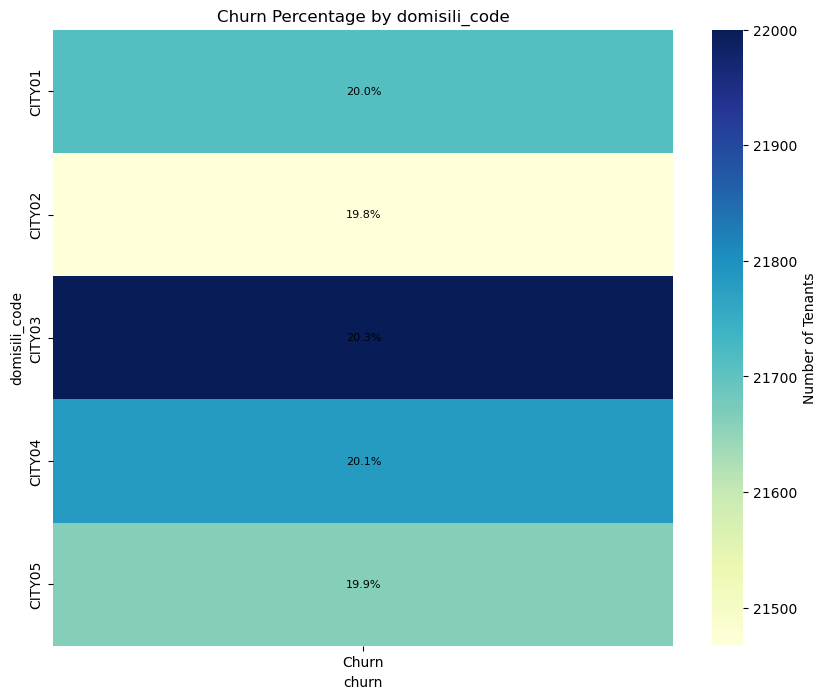

In [14]:
filtered_df = booking_clean[booking_clean['churn'] == 'Churn']
df_grouped = filtered_df.groupby(['domisili_code', 'churn'])['churn'].count().unstack(1)
df_grouped['total'] = df_grouped.sum(axis=1)

total = booking_clean[booking_clean['churn'] == 'Churn']['tenant_id'].count() 
df_grouped.drop('total', axis=1, inplace=True)
df_heatmap = df_grouped.copy()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_heatmap, annot=False, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Number of Tenants'})

for i in range(len(df_heatmap.index)):
    for j in range(len(df_heatmap.columns)):
        value = df_heatmap.iloc[i, j]
        text = f'{value/total*100:.1f}%'
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=8)

plt.title('Churn Percentage by domisili_code')
plt.show()

In [42]:
churn_counts = booking_clean[booking_clean['churn'] == 'Churn']['domisili_code'].value_counts()
total_tenant = booking_clean['domisili_code'].value_counts()
percentage_churn = churn_counts / total_tenant * 100

percentage_churn_sorted = percentage_churn.sort_values(ascending=False)
print(percentage_churn_sorted)

CITY03    50.368607
CITY05    50.078605
CITY04    50.063205
CITY01    49.823297
CITY02    49.763550
Name: domisili_code, dtype: float64


In [43]:
churn_counts = booking_clean[booking_clean['churn'] == 'Not Churn']['domisili_code'].value_counts()
total_tenant = booking_clean['domisili_code'].value_counts()
percentage_churn = churn_counts / total_tenant * 100

percentage_churn_sorted = percentage_churn.sort_values(ascending=False)
print(percentage_churn_sorted)

CITY02    50.236450
CITY01    50.176703
CITY04    49.936795
CITY05    49.921395
CITY03    49.631393
Name: domisili_code, dtype: float64


Based on the chart, there doesn't seem to be a significant difference between cities in terms of the percentage of tenants who have stopped using the service, with approximately 49%-50% in each city. This indicates that there is no clear trend among tenants in deciding to cancel payments based on their location or the city they reside in.

### How is the distribution of tenant account age relative to the churn rate?

In [51]:
def make_pivot(param1, param2):     
    df_slice = booking_clean[[param1, param2, 'tenant_id']]     
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size, fill_value=0)     
    
    order = slice_pivot.sum(axis=1).sort_values(ascending=False).index
    p_chart = slice_pivot.loc[order].plot(kind='barh')
    
    for container in p_chart.containers:
        total = booking_clean['tenant_id'].count()
        for value in container:
            percentage = value.get_width() / total
            x = value.get_x() + value.get_width() / 2.
            y = value.get_y() + value.get_height() / 2.
            p_chart.annotate(f'{percentage:.2%}', (x, y), ha='center', va='center', fontsize=6)
    
    plt.xticks(rotation=0)     
    return slice_pivot, p_chart

(                   tenant_id          
 churn                  Churn Not Churn
 age_category                          
 Intermediate Users     52349     52612
 Long-Term Users        26531     26315
 New Users              29741     29607,
 <Axes: ylabel='age_category'>)

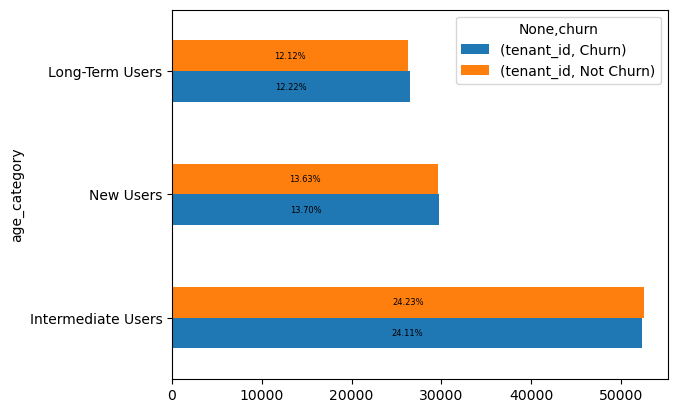

In [52]:
make_pivot('age_category', 'churn')

The data analysis indicates a stable churn rate across various account age categories. New Users have a churn rate of 50.12% and a non-churn rate of 49.88%. Intermediate Users have a churn rate of 49.79% and a non-churn rate of 50.21%. Meanwhile, Long-term Users experience a churn rate of 50.19%, with a non-churn rate of 49.81%. This comparison illustrates relatively small differences between churn and non-churn rates in each category.

The primary recommendation for retention strategy is to focus on introducing the product's value to New Users through personalized and intensive communication. Additionally, it is crucial to support Intermediate Users by enhancing their understanding and addressing factors influencing the churn rate, as this may be key to reducing the overall churn rate.

### How does the distribution of sign up methods used by tenants affect the churn rate?

(            tenant_id          
 churn           Churn Not Churn
 signup_type                    
 Android           651       566
 Web             26601     26485
 iOS              2873      2832
 unknown         78496     78651,
 <Axes: xlabel='signup_type'>)

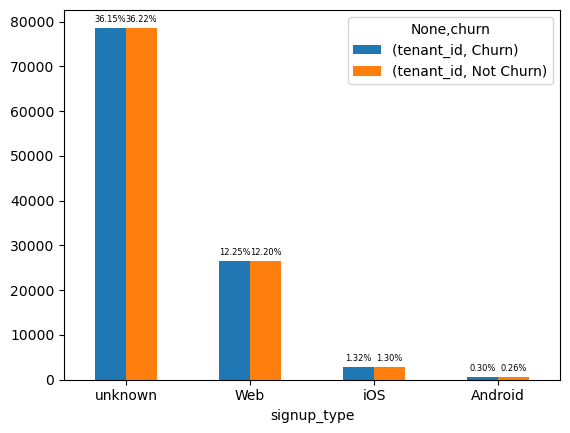

In [25]:
make_pivot('signup_type', 'churn')

Based on the chart, the majority of Company M tenants use the basic registration method (using email and password). From the basic registration method, it is known that 50.05% of users are still using the service. For those who registered using the Google method, 50.2% are no longer using the service. Registration via phone number is the least utilized method. For the registration method that is unknown, 49% of tenants did not continue the service. The number of tenants leaving the service and those who are not is not significantly different.

### How does the distribution of sign up types carried out by tenants affect the churn rate?

(              tenant_id          
 churn             Churn Not Churn
 signup_method                    
 basic             76371     76526
 google            30145     29863
 phone_number        282       264
 unknown            1823      1881,
 <Axes: xlabel='signup_method'>)

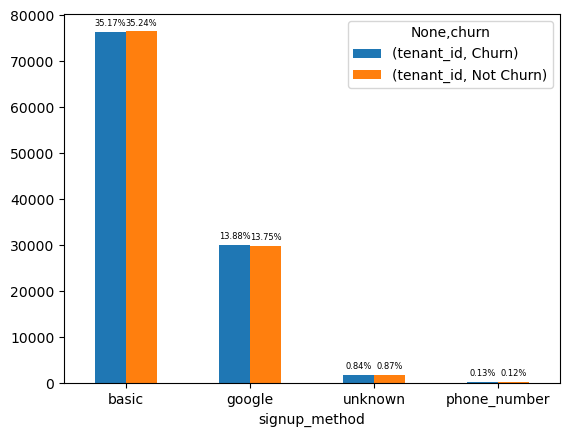

In [26]:
make_pivot('signup_method', 'churn')

Based on the sign-up type chart, there are categories such as unknown, web, iOS, and Android. The majority of tenants with an unknown sign-up type use an unspecified method. Tenants who register through the web platform have a higher percentage of leaving the Company M service, around 50.01%. Users on the iOS platform show a percentage of those still leaving the service at 50.35%. Meanwhile, Android users have a percentage of those who have already left the service at 53.49%. From this information, it can be concluded that most tenants prefer signing up through the website.

# Recomendation

* Conducting an evaluation of the products and services by surveying users and conducting market research through collected feedback is a commendable approach. The findings can be reviewed to enhance ease of use and user comfort, thereby increasing user retention. Subsequently, marketing campaigns can be implemented to enhance service visibility. The fluctuation in the growth of tenants each year necessitates Company M to design strategies to improve and maintain customer retention based on evolving trends. Offers can be targeted, such as providing promotions during the start of the academic year for students, to increase the number of tenants. It's essential to consistently provide excellent service and maintain relationships with tenants to sustain their retention.

* Analyzing the preferences, needs, and behaviors of Intermediate users can help identify effective solutions to retain them within the service ecosystem. Additionally, providing specific loyalty programs for Intermediate users with benefits that enhance satisfaction and retention is recommended.

* Boosting promotions for the New User Booking program on the basic registration screen of the website is advised. Offering more attractive and exclusive deals for users selecting this registration method, such as special discounts, additional reward points, or other exclusive benefits, can encourage users to choose the basic registration option on the website due to its simplicity and advantages.

* Conducting an in-depth analysis of the data transfer, especially during the data collection and transfer phases, is crucial. Identifying the processes involved in data transfer and checking for disruptions or failures in these processes causing features in the data to contain null values is important.
